# **KMeans Clustering - Customer Debt Profiles**

- Yvon Bilodeau
- June 2022



---



## **Objectives**


Clustering is a common unsupervised learning task in which we try to group our data into distinct clusters or groups based on common characteristics or patterns.

- Key objectives:
   - Inspect and Clean the data if necessary
   - Perform an Exploratory Data Analysis
   - Utilize SKLearn's KMeans to cluster the data into individual group clusters
   - Describe the characteristics of each individual group cluster.

### **Source of data**

- [Data Source](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means)



## **Import Libraries | Load the Dataset**

### **Import Libraries**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

from sklearn import set_config
set_config(display='diagram')

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

### **Load the Dataset**

- Data downloaded from [link](https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv).


In [2]:
# Load the dataset.
filename = "https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv"
df = pd.read_csv(filename)

## **Inspect the Data**

### Display the Row and Column Count

In [3]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]} features.')

There are 850 rows, and 10 columns.
The rows represent 850 observations, and the columns represent 10 features.


### Display Data Types

In [4]:
# Display the names, non-null counts, and the datatypes for each column
# Columns with mixed datatypes are identified as an object datatype
df.dtypes

Unnamed: 0           int64
Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

- All features have numeric datatypes.

### Display Column Names, Count of Non-Null Values, and Data Types

In [5]:
# Display the column names, count of non-null values, and their datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


### Display First (5) Rows

In [6]:
# Display the first (5) rows of the dataframe 
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


- Data appears to have loaded correctly.

## **Clean the Data**

In [7]:
# Display the descriptive statistics for the numeric columns 
df.describe()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,424.50000,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,0.00000,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,212.25000,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,424.50000,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,636.75000,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,849.00000,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


### **Remove Unnecessary Columns**

In [8]:
# Drop columns
df.drop(columns = ['Unnamed: 0', 'Customer Id', 'Other Debt'], inplace=True)

- Confirm column has been dropped.

In [9]:
# Display the first (5) rows of the dataframe
# to confirm columns have been dropped
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,0.0,6.3
1,47,1,26,100,4.582,0.0,12.8
2,33,2,10,57,6.111,1.0,20.9
3,29,2,4,19,0.681,0.0,6.3
4,47,1,31,253,9.308,0.0,7.2


### **Remove Unecessary Rows**

In [10]:
# Count the number of duplicate rows
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


- No duplicates were found or dropped.

### **Missing Values**

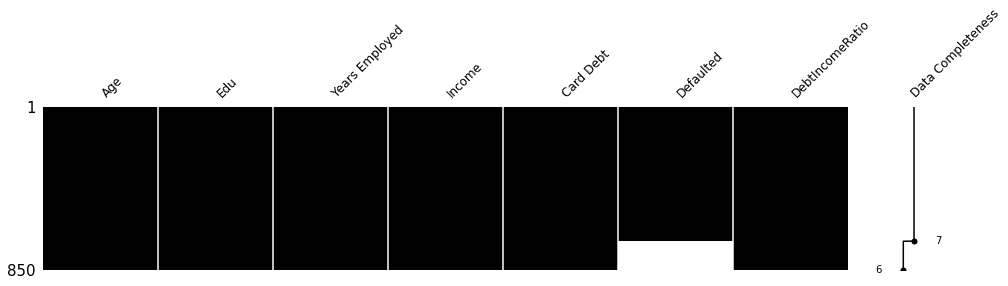

In [11]:
# Visualize missing values by column
msno.matrix(df, figsize=(16,3), labels=True, fontsize=12, sort="descending", color=(0,0,0));

In [12]:
# Display the count of missing values by column
print(df.isna().sum())

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Defaulted          150
DebtIncomeRatio      0
dtype: int64


- 'Defaulted' column has 150 missing values.

#### **Statistics Function**

In [13]:
# Creates a function to display supplemental statistics
def column_statistics(column_name, max_unique_values_to_disply=20):
    # Display the count of missing values for this column.
    print(f'Missing Values: {df[column_name].isna().sum()} ({round((df[column_name].isna().sum())/(df.shape[0])*100,1)})%')

    # Determine Outliers - Only if this is a numeric column
    if (df[column_name].dtype == 'int64') | (df[column_name].dtype == 'float64'):
        # Create outlier filters
        q1 = df[column_name].quantile(0.25) # 25th percentile
        q3 = df[column_name].quantile(0.75) # 75th percentile
        iqr = q3 - q1 # Interquartile range
        low_limit = q1 - (1.5 * iqr) # low limit
        high_limit = q3 + (1.5 * iqr) # high limit
        # Create outlier dataframes
        low_df = df[(df[column_name] < low_limit)]
        high_df = df[(df[column_name] > high_limit)]
        # Calculate the outlier counts and percentages
        low_oulier_count = low_df.shape[0]
        low_outlier_percentge = round(((low_oulier_count)/(df.shape[0])*100),1)
        high_oulier_count = high_df.shape[0]
        high_outlier_percentge = round(((high_oulier_count)/(df.shape[0])*100),1)
        # Display the outlier counts
        print(f'Outliers: {low_oulier_count} ({low_outlier_percentge})% low, {high_oulier_count} ({high_outlier_percentge})% high')
        
    # Display the count of unique values for this column
    print(f'Unique values: {df[column_name].nunique()}')

    # Display the unique values including Nan and their counts for this column,
    # if the number of unique values is below the function parameter
    if df[column_name].nunique() < max_unique_values_to_disply:
        print(df[column_name].value_counts(dropna=False))

#### **Numeric Columns**

##### **Defaulted column**

In [14]:
# Display function's supplemental statistics
column_statistics('Defaulted', 1000)

Missing Values: 150 (17.6)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 2
0.0    517
1.0    183
NaN    150
Name: Defaulted, dtype: int64


- Defaulted column is boolean 0 (Negative) and 1 (Positive).
- If we replace the 'NaN' values with 'Unkown', '0' with 'Negative', and '1' with 'Positive', we can One Hot Code this feature without introducing bias.

In [15]:
# Replace NaN values with 'Unknown' value
df.Defaulted.fillna('Unknown',inplace=True)

In [16]:
# Update the column datatype to a string datatype
df['Defaulted'] = df['Defaulted'].astype(str)

In [17]:
# Display function's supplemental statistics
column_statistics('Defaulted', 5)

Missing Values: 0 (0.0)%
Unique values: 3
0.0        517
1.0        183
Unknown    150
Name: Defaulted, dtype: int64


In [18]:
# Define a dictionary with key/value pairs and use it to replace values
dict = {"0.0": 'Negative', "1.0": 'Positive'}
df.replace({'Defaulted': dict}, inplace = True)

In [19]:
# Display function's supplemental column statistics
column_statistics('Defaulted', 5)

Missing Values: 0 (0.0)%
Unique values: 3
Negative    517
Positive    183
Unknown     150
Name: Defaulted, dtype: int64


### **Inspect Column Datatypes for Errors**

In [20]:
 # Ensure all columns match the data types listed in the data dictionary.
df.dtypes

Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Defaulted           object
DebtIncomeRatio    float64
dtype: object

In [21]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,Negative,6.3
1,47,1,26,100,4.582,Negative,12.8
2,33,2,10,57,6.111,Positive,20.9
3,29,2,4,19,0.681,Negative,6.3
4,47,1,31,253,9.308,Negative,7.2


- All columns match their datatypes.

### **Inspect Column Names for Errors**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.(example: cat, Cat, cats)

#### **Object Datatypes**

In [22]:
# Display column names for object datatypes.
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Defaulted'], dtype='object')

- No issues noted.

#### **Numerical Datatypes**

In [23]:
# Display the column names for the numeric columns.
dtypes = df.dtypes
str_cols = dtypes[(dtypes == "float64") | (dtypes == "int64")].index
str_cols

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'DebtIncomeRatio'],
      dtype='object')

- No issues noted.

### **Inspect Column Values for Errors**

#### **Object Datatypes**

Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

Check for typos or inconsistencies in strings that need to be fixed.

In [24]:
# Display the descriptive statistics for the non-numeric columns.
df.describe(exclude="number")

,Defaulted
count,850
unique,3
top,Negative
freq,517


- No issues noted.

##### **Defaulted column**

In [25]:
# Display the unique values for this column.
print(df['Defaulted'].unique())

['Negative' 'Positive' 'Unknown']


In [26]:
# Display the unique values and their counts for this column.
df['Defaulted'].value_counts()

Negative    517
Positive    183
Unknown     150
Name: Defaulted, dtype: int64

- No issues noted.

#### **Numerical Datatypes**

In [27]:
# Display the descriptive statistics for the numeric columns.
df.describe().round(2)

,Age,Edu,Years Employed,Income,Card Debt,DebtIncomeRatio
count,850.00,850.00,850.00,850.00,850.00,850.00
mean,35.03,1.71,8.57,46.68,1.58,10.17
std,8.04,0.93,6.78,38.54,2.13,6.72
min,20.00,1.00,0.00,13.00,0.01,0.10
25%,29.00,1.00,3.00,24.00,0.38,5.10
50%,34.00,1.00,7.00,35.00,0.88,8.70
75%,41.00,2.00,13.00,55.75,1.90,13.80
max,56.00,5.00,33.00,446.00,20.56,41.30


- No issues noted.

## **Exploratory Data Analysis**

### **Numeric Columns**

#### **Summary Statistics**

In [28]:
# Display the descriptive statistics for the numeric columns.
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,41.300000


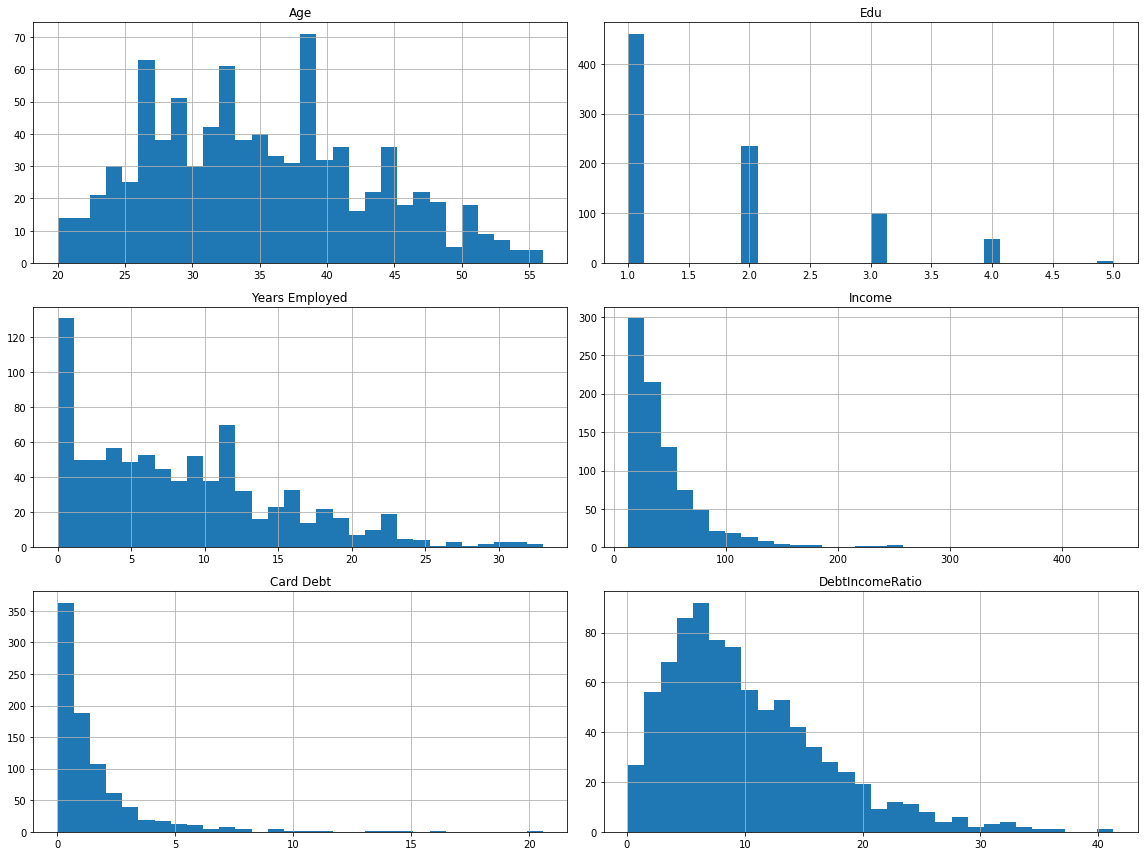

In [29]:
# Display histogram charts for the numeric columns in the dataframe.
df.hist(figsize=(16,12), bins=30)
plt.tight_layout()
plt.show;

#### **Age**

In [30]:
# Display column statistics.
df.Age.describe()

count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64

In [31]:
# Display column statistics.
column_statistics('Age')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 37


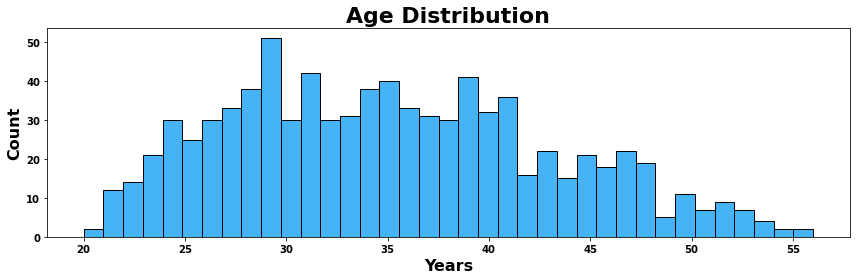

In [32]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Age', color='#069AF3', bins=37); 
plt.title('Age Distribution', fontsize = 22, weight='bold')
plt.xlabel('Years', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

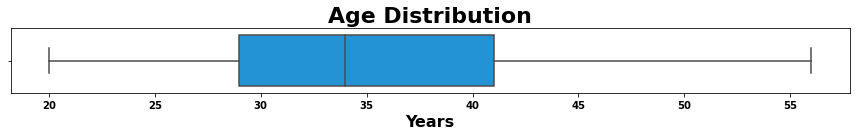

In [33]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Age', color='#069AF3'); 
plt.title('Age Distribution', fontsize = 22, weight='bold')
plt.xlabel('Years', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - Age is not evenly dispersed.
- **Skew** - Age is only slightly positively skewed.
- **Outliers** - Age does not have any ouliers

#### **Edu**

In [34]:
# Display column statistics.
column_statistics('Edu')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 54 (6.4)% high
Unique values: 5
1    460
2    235
3    101
4     49
5      5
Name: Edu, dtype: int64


In [35]:
column_statistics('Edu')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 54 (6.4)% high
Unique values: 5
1    460
2    235
3    101
4     49
5      5
Name: Edu, dtype: int64


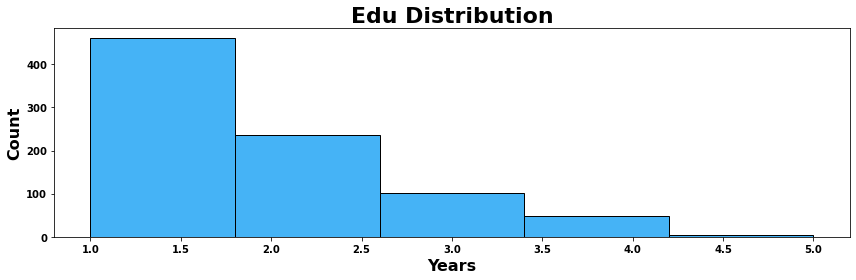

In [36]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Edu', color='#069AF3', bins=5); 
plt.title('Edu Distribution', fontsize = 22, weight='bold')
plt.xlabel('Years', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

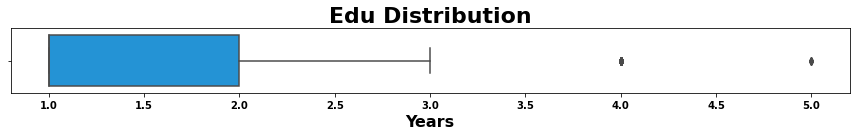

In [37]:
plt.figure(figsize = (12, 2))

sns.boxplot(data=df, x='Edu', color='#069AF3'); 

plt.title('Edu Distribution', fontsize = 22, weight='bold')
plt.xlabel('Years', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)

plt.tight_layout()
plt.show;

- **Dispersion** - Edu is not evenly dispersed.
- **Skew** - Edu is positivley skewed.
- **Outliers** - Edu has 54 (6.4)% outliers on the high side.

#### **Years Employed**

In [38]:
# Display column statistics.
df['Years Employed'].describe()

count    850.000000
mean       8.565882
std        6.777884
min        0.000000
25%        3.000000
50%        7.000000
75%       13.000000
max       33.000000
Name: Years Employed, dtype: float64

In [39]:
# Display column statistics.
column_statistics('Years Employed')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 10 (1.2)% high
Unique values: 33


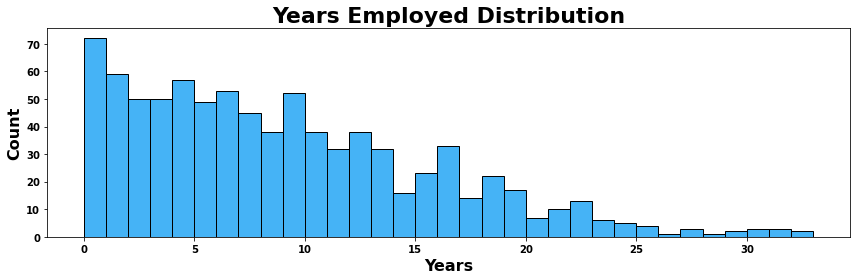

In [40]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Years Employed', color='#069AF3', bins=33); 
plt.title('Years Employed Distribution', fontsize = 22, weight='bold')
plt.xlabel('Years', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

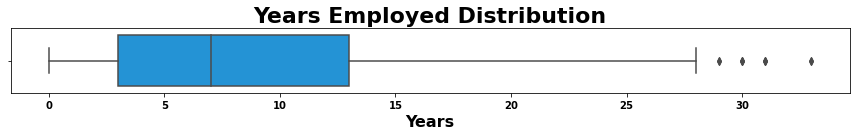

In [41]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Years Employed', color='#069AF3'); 
plt.title('Years Employed Distribution', fontsize = 22, weight='bold')
plt.xlabel('Years', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - Years Employed is not evenly disersed.
- **Skew** - Years Employed is positively skewed.
- **Outliers** - Years Employed has 10 (1.2)% outliers on the high side.

#### **Income**

In [42]:
# Display column statistics.
df.Income.describe()

count    850.000000
mean      46.675294
std       38.543054
min       13.000000
25%       24.000000
50%       35.000000
75%       55.750000
max      446.000000
Name: Income, dtype: float64

In [43]:
# Display column statistics.
column_statistics('Income')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 53 (6.2)% high
Unique values: 129


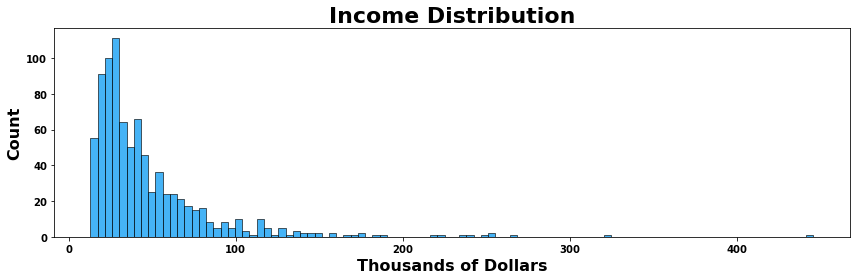

In [44]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Income', color='#069AF3', bins=100); 
plt.title('Income Distribution', fontsize = 22, weight='bold')
plt.xlabel('Thousands of Dollars', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

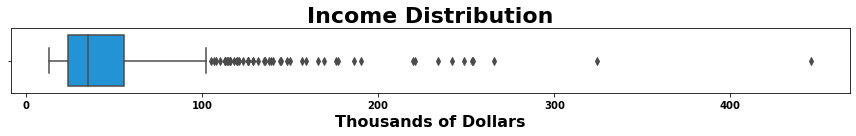

In [45]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Income', color='#069AF3'); 
plt.title('Income Distribution', fontsize = 22, weight='bold')
plt.xlabel('Thousands of Dollars', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - Income is not evenly dispersed.
- **Skew** - Income is positively skewed.
- **Outliers** - Income has 53 (6.2)% outliers on the high side.

#### **Card Debt**

In [46]:
# Display column statistics.
df['Card Debt'].describe()

count    850.000000
mean       1.576820
std        2.125843
min        0.012000
25%        0.382500
50%        0.885000
75%        1.898500
max       20.561000
Name: Card Debt, dtype: float64

In [47]:
# Display column statistics.
column_statistics('Card Debt')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 69 (8.1)% high
Unique values: 727


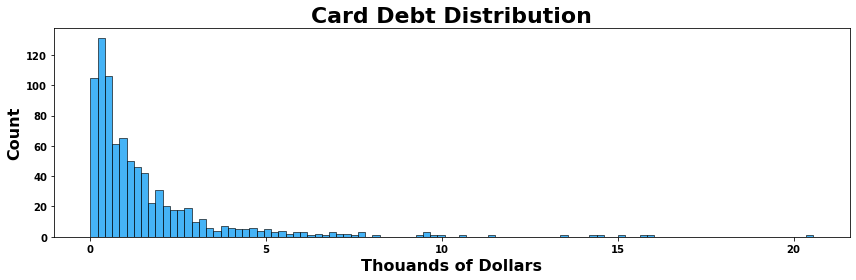

In [48]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='Card Debt', color='#069AF3', bins=100); 
plt.title('Card Debt Distribution', fontsize = 22, weight='bold')
plt.xlabel('Thouands of Dollars', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

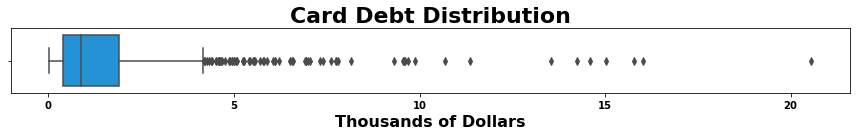

In [49]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='Card Debt', color='#069AF3'); 
plt.title('Card Debt Distribution', fontsize = 22, weight='bold')
plt.xlabel('Thousands of Dollars', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - Card Debt is not evenly dispersed.
- **Skew** - Card Debt is positively skewed.
- **Outliers** - Card Debt has 69 (8.1)% outliers on the high side.

#### **DebtIncomeRatio**

In [50]:
# Display column statistics.
df.DebtIncomeRatio.describe()

count    850.000000
mean      10.171647
std        6.719441
min        0.100000
25%        5.100000
50%        8.700000
75%       13.800000
max       41.300000
Name: DebtIncomeRatio, dtype: float64

In [51]:
# Display column statistics.
column_statistics('DebtIncomeRatio')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 21 (2.5)% high
Unique values: 245


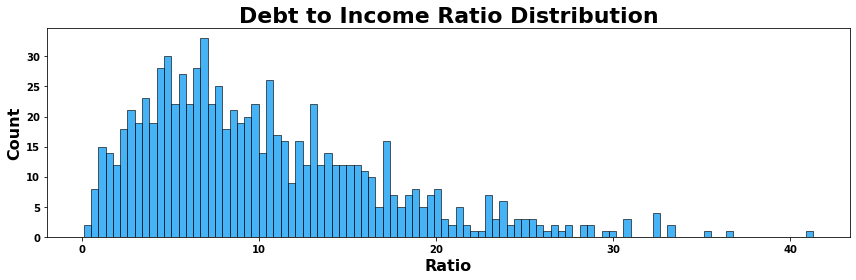

In [52]:
plt.figure(figsize = (12,4))
sns.histplot(data=df, x='DebtIncomeRatio', color='#069AF3', bins=100); 
plt.title('Debt to Income Ratio Distribution', fontsize = 22, weight='bold')
plt.xlabel('Ratio', fontsize = 16, weight='bold')
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

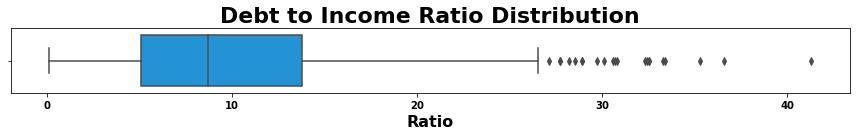

In [53]:
plt.figure(figsize = (12, 2))
sns.boxplot(data=df, x='DebtIncomeRatio', color='#069AF3'); 
plt.title('Debt to Income Ratio Distribution', fontsize = 22, weight='bold')
plt.xlabel('Ratio', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.tight_layout()
plt.show;

- **Dispersion** - DebtIncomeRatio is not evenly dispersed.
- **Skew** - DebtIncomeRatio is positively skewed.
- **Outliers** - DebtIncomeRatio has 21 (2.5)% outliers on the high side.

### **Categorical Columns**

#### **Summary Statistics**

In [54]:
# Display the descriptive statistics for the non-numeric columns.
df.describe(exclude=('number'))

,Defaulted
count,850
unique,3
top,Negative
freq,517


- No issues noted.

#### **Defaulted**

In [55]:
# Display column statistics.
df.Defaulted.describe()

count          850
unique           3
top       Negative
freq           517
Name: Defaulted, dtype: object

In [56]:
# Display column statistics.
column_statistics('Defaulted')

Missing Values: 0 (0.0)%
Unique values: 3
Negative    517
Positive    183
Unknown     150
Name: Defaulted, dtype: int64


In [57]:
# Display column statistics.
df['Defaulted'].value_counts(normalize=True)

Negative    0.608235
Positive    0.215294
Unknown     0.176471
Name: Defaulted, dtype: float64

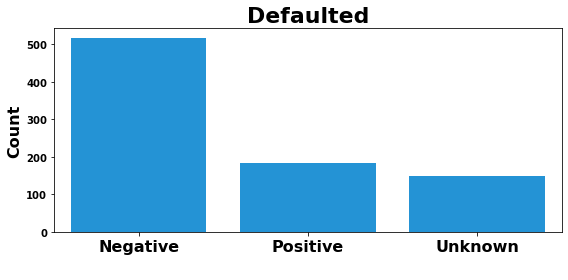

In [58]:
plt.figure(figsize = (8,4))
sns.countplot(data=df, x=df.Defaulted, color='#069AF3')
plt.title('Defaulted', fontsize = 22, weight='bold');
plt.xlabel('Defaulted', fontsize = 16, weight='bold', color='#FFFFFF');
plt.ylabel('Count', fontsize = 16, weight='bold');
plt.xticks(fontsize = 16, weight='bold', rotation=0);
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

- Issues noted - There is a significantly higher count of Negative, than either Positive or Unknown values.

### **Correlation Heatmap**

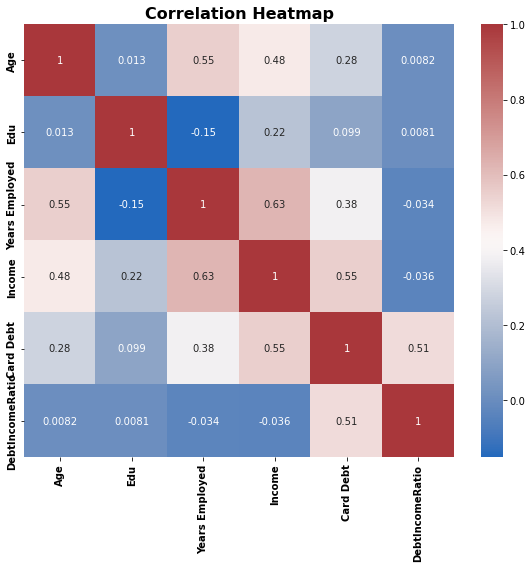

In [59]:
plt.figure(figsize = (8, 8))
corr = df.corr()
sns.heatmap(corr, cmap='vlag', annot=True);
plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');
plt.tight_layout()
plt.show;

- There are no highly correlated features.



---



## **Preprocessing for Machine Learning**

### **Identify each feature as ordinal, numerical, nominal, or pass through**

- ordinal features = none
- numeric features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'DebtIncomeRatio']
- nominal features = ['Defaulted]
- date/time features = none
- pass through = none

### **Instantiate Column Selectors**

In [60]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [61]:
cat_selector(df)

['Defaulted']

In [62]:
num_selector(df)

['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'DebtIncomeRatio']

### **Instantiate Transformers**

In [63]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

### **Instantiate Pipelines**

In [64]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [65]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### **Instantiate ColumnTransformer**

In [66]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000201D54F0CC8>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000201D54F0B08>)])

### **Fit and Transform Data**

In [67]:
# Fit on df
preprocessor.fit(df)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000201D54F0CC8>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000201D54F0B08>)])

In [68]:
# Transform Train and Test
df_processed_array = preprocessor.transform(df)

### **Inspect the Result**

In [69]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(df_processed_array).sum().sum(), 'missing values in the processed data array.')
print('All data in the array is', df_processed_array.dtype)

print('The shape of the array is', df_processed_array.shape)
print('\n')
df_processed_array

0 missing values in the processed data array.
All data in the array is float64
The shape of the array is (850, 9)




array([[ 0.74291541,  0.31212243, -0.37878978, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.        ,
         0.        ,  0.        ],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.        ,
         1.        ,  0.        ],
       [-0.37694723, -0.76634938,  0.50696349, ...,  1.        ,
         0.        ,  0.        ],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  1.        ,
         0.        ,  0.        ]])

In [70]:
processed_df = pd.DataFrame(df_processed_array)

In [71]:
processed_df.describe().round(2)

,0,1,2,3,4,5,6,7,8
count,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00,850.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.61,0.22,0.18
std,1.00,1.00,1.00,1.00,1.00,1.00,0.49,0.41,0.38
min,-1.87,-0.77,-1.26,-0.87,-0.74,-1.50,0.00,0.00,0.00
25%,-0.75,-0.77,-0.82,-0.59,-0.56,-0.76,0.00,0.00,0.00
50%,-0.13,-0.77,-0.23,-0.30,-0.33,-0.22,1.00,0.00,0.00
75%,0.74,0.31,0.65,0.24,0.15,0.54,1.00,0.00,0.00
max,2.61,3.55,3.61,10.37,8.94,4.64,1.00,1.00,1.00


In [72]:
processed_df.head()

,0,1,2,3,4,5,6,7,8
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.576525,1.0,0.0,0.0
1,1.489490,-0.766349,2.573721,1.384325,1.414474,0.391387,1.0,0.0,0.0
2,-0.252518,0.312122,0.211712,0.268032,2.134141,1.597554,0.0,1.0,0.0
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.576525,1.0,0.0,0.0
4,1.489490,-0.766349,3.311849,5.356249,3.638900,-0.442507,1.0,0.0,0.0


## **Processing**

### **Inertia Elbow Plot**

Text(0, 0.5, 'inertia')

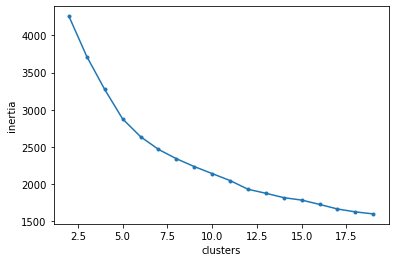

In [73]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 20 and store the inertias in the list.
for k in range(2,20):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(processed_df)  
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,20), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')

### **Silhouette Score Plot**

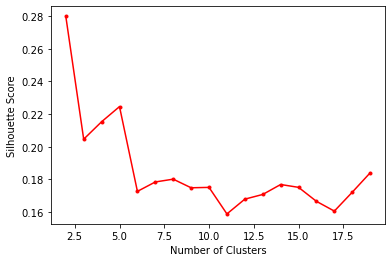

In [74]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 20):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(processed_df)
  silhouette_scores.append(silhouette_score(processed_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 20), silhouette_scores, marker = '.', color ='r')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

### **Inertia Elbow and Silhouette Score Plots Combined**

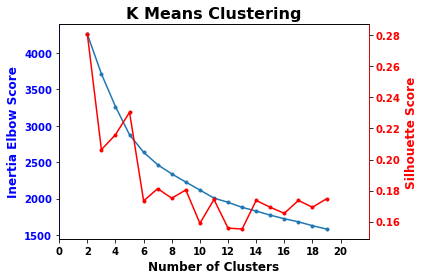

In [75]:
# Create empty lists
inertias = []
silhouette_scores = []
#Loop through k values between 2 and 20 and store the inertias in the list.
for k in range(2,20):  
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(processed_df)  
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(processed_df, kmeans.labels_)) 
# Visualize scores
fig, ax1 = plt.subplots(figsize=(6,4))
plt.title('K Means Clustering', fontsize = 16, weight='bold')

ax1.plot(range(2, 20), inertias, marker = '.')
ax1.set_ylabel('Inertia Elbow Score', color='b', fontsize = 12, weight='bold');
plt.xlabel('Number of Clusters', fontsize = 12, weight='bold')
plt.xticks(fontsize = 10, weight='bold')
plt.yticks(fontsize = 10, weight='bold');
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_ticks(np.arange(0, 22, 2))
plt.xlim([0, 22])

ax2 = ax1.twinx()
ax2.plot(range(2, 20), silhouette_scores, color='r', marker = '.');
ax2.set_ylabel('Silhouette Score', color='r', fontsize = 12, weight='bold', );
plt.yticks(fontsize = 10, weight='bold');
ax2.tick_params(axis='y', labelcolor='r')
ax1.spines['left'].set_color('b');
ax2.spines['right'].set_color('r');

plt.tight_layout()
plt.show;

**K = 5** would be the value I would choose to optimize both the Inertia Score and the Silhouette Score.
- **Inertia Score** - The best clustering is a balance between the lowest number of clusters and the lowest inertia. 
- **Silhouette Score** -  The best score is 1 (signaling well-defined & well-separated clusters) and the worst is -1. 





---



## **Explanatory Analysis of KMeans Clusters**

### **Instantiate and Fit the Model** 

In [76]:
# Refit KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(processed_df)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head(10)

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio,cluster
0,41,2,6,19,0.124,Negative,6.3,3
1,47,1,26,100,4.582,Negative,12.8,1
2,33,2,10,57,6.111,Positive,20.9,0
3,29,2,4,19,0.681,Negative,6.3,3
4,47,1,31,253,9.308,Negative,7.2,4
5,40,1,23,81,0.998,Unknown,10.9,1
6,38,2,4,56,0.442,Negative,1.6,3
7,42,3,0,64,0.279,Negative,6.6,2
8,26,1,5,18,0.575,Unknown,15.5,3
9,47,3,23,115,0.653,Negative,4.0,1


### **Analyze the Clusters**

In [77]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,DebtIncomeRatio
0,0,33.412903,1.612903,6.367742,36.141935,2.499206,19.927097
1,1,42.456731,1.490385,16.456731,73.471154,1.834654,8.113942
2,2,34.018349,3.477064,4.853211,45.706422,1.184119,8.935780
3,3,31.128852,1.324930,5.366947,28.627451,0.591896,7.019328
4,4,44.952381,2.000000,20.285714,170.857143,10.996952,18.552381


### **For Each Feature Visualize the Mean Values For Each Cluster**

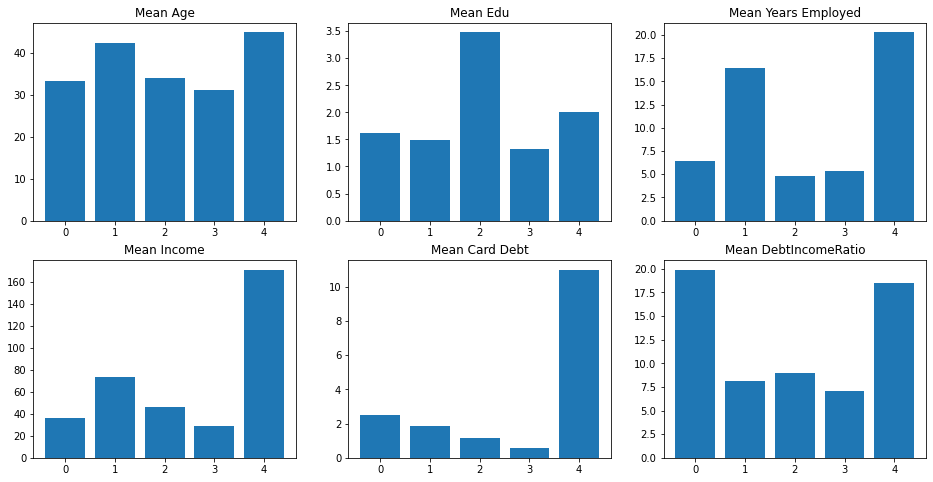

In [78]:
# Visualize means 
fig, axes = plt.subplots(2,3, figsize = (16, 8))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

In [79]:
def cluster_means_report(cluster):
    print(f'Cluster: {cluster} Mean Comparison Report')
    cluster_mean_Age = round(cluster_groups.loc[cluster]['Age'],2)
    col_mean_Age = round(df['Age'].mean(),2)
    print(f'Age: cluster mean: {cluster_mean_Age}, column mean: {col_mean_Age}')
    print(f'     The cluster mean is {round(cluster_mean_Age/col_mean_Age,4)*100}% of the column mean.')

    cluster_mean_Edu = round(cluster_groups.loc[cluster]['Edu'],2)
    col_mean_Edu = round(df['Edu'].mean(),2)
    print(f'Edu: cluster mean: {cluster_mean_Edu}, column mean:  {col_mean_Edu}')
    print(f'     The cluster mean is {round(cluster_mean_Edu/col_mean_Edu,4)*100}% of the column mean.')

    cluster_mean_YrsEmp= round(cluster_groups.loc[cluster]['Years Employed'],2)
    col_mean_YrsEmp = round(df['Years Employed'].mean(),2)
    print(f'Years Employed: cluster mean: {cluster_mean_YrsEmp}, column mean: {col_mean_YrsEmp}')
    print(f'     The cluster mean is {round(cluster_mean_YrsEmp/col_mean_YrsEmp,4)*100}% of the column mean.')

    cluster_mean_Income= round(cluster_groups.loc[cluster]['Income'],2)
    col_mean_Income = round(df['Income'].mean(),2)
    print(f'Income: cluster mean: {cluster_mean_Income}, column mean: {col_mean_Income}')
    print(f'     The cluster mean is {round(cluster_mean_Income/col_mean_Income,4)*100}% of the column mean.')

    cluster_mean_CrdDbt= round(cluster_groups.loc[cluster]['Card Debt'],2)
    col_mean_CrdDbt = round(df['Card Debt'].mean(),2)
    print(f'Card Debt: cluster mean: {cluster_mean_CrdDbt}, column mean: {col_mean_CrdDbt}')
    print(f'     The cluster mean is {round(cluster_mean_CrdDbt/col_mean_CrdDbt,4)*100}% of the column mean.')

    cluster_mean_DbtIncmRto= round(cluster_groups.loc[cluster]['DebtIncomeRatio'],2)
    col_mean_DbtIncmRto = round(df['DebtIncomeRatio'].mean(),2)
    print(f'DebtIncomeRatio: cluster mean: {cluster_mean_DbtIncmRto}, column mean: {col_mean_DbtIncmRto}')
    print(f'     The cluster mean is {round(cluster_mean_DbtIncmRto/col_mean_DbtIncmRto,4)*100}% of the column mean.')

In [80]:
df['Defaulted'].value_counts(normalize=True)

Negative    0.608235
Positive    0.215294
Unknown     0.176471
Name: Defaulted, dtype: float64

### **Cluster 0:**

In [81]:
# Cluster Mean Comparison Report
cluster_means_report(0)

Cluster: 0 Mean Comparison Report
Age: cluster mean: 33.41, column mean: 35.03
     The cluster mean is 95.38% of the column mean.
Edu: cluster mean: 1.61, column mean:  1.71
     The cluster mean is 94.15% of the column mean.
Years Employed: cluster mean: 6.37, column mean: 8.57
     The cluster mean is 74.33% of the column mean.
Income: cluster mean: 36.14, column mean: 46.68
     The cluster mean is 77.42% of the column mean.
Card Debt: cluster mean: 2.5, column mean: 1.58
     The cluster mean is 158.23000000000002% of the column mean.
DebtIncomeRatio: cluster mean: 19.93, column mean: 10.17
     The cluster mean is 195.97% of the column mean.


In [82]:
# Dataset statistics:
# Negative    0.608235
# Positive    0.215294
# Unknown     0.176471

# Display column statistics.
c0_filter = df['cluster'] == 0
df[c0_filter]['Defaulted'].value_counts(normalize=True)

Positive    0.541935
Negative    0.316129
Unknown     0.141935
Name: Defaulted, dtype: float64

**Cluster 0: High in Debt and High Default Risk Group**

- Years Employed and Income are below average.
- Age and Education only very slightly below average.
- Card Debt is 158.2% of the average, which is highly significant.
- DebtIncomeRatio is 196.0% of the average, which is highly significant.
- **Default Rate is 54.2%, 251.6% of the average, which is extremely highly significant.**

Reccomend all accounts be closed, and no additional offers of credit be made.

### **Cluster 1:**

In [83]:
# Cluster Mean Comparison Report
cluster_means_report(1)

Cluster: 1 Mean Comparison Report
Age: cluster mean: 42.46, column mean: 35.03
     The cluster mean is 121.21% of the column mean.
Edu: cluster mean: 1.49, column mean:  1.71
     The cluster mean is 87.13% of the column mean.
Years Employed: cluster mean: 16.46, column mean: 8.57
     The cluster mean is 192.07% of the column mean.
Income: cluster mean: 73.47, column mean: 46.68
     The cluster mean is 157.39000000000001% of the column mean.
Card Debt: cluster mean: 1.83, column mean: 1.58
     The cluster mean is 115.82% of the column mean.
DebtIncomeRatio: cluster mean: 8.11, column mean: 10.17
     The cluster mean is 79.74% of the column mean.


In [84]:
# Dataset statistics:
# Negative    0.608235
# Positive    0.215294
# Unknown     0.176471

# Display column statistics.
c1_filter = df['cluster'] == 1
df[c1_filter]['Defaulted'].value_counts(normalize=True)

Negative    0.745192
Unknown     0.211538
Positive    0.043269
Name: Defaulted, dtype: float64

**Cluster1: High Income and Highly Experienced Group with Low Risk Default Group**
- **Default Rate is 4.32%, 20.1% of the average, which is extremely highly significant.**
- DbtIncomeRatio and Edu are below the average.
- Age and Card Debt are slightly above the average.
- Income is 157.3% of the average, which is significant.
- **Years employed is 192.1% of the average, which is highly significant.**

Reccomend credit line increases, and additional credit offers.

### **Cluster 2:**

In [85]:
# Cluster Mean Comparison Report
cluster_means_report(2)

Cluster: 2 Mean Comparison Report
Age: cluster mean: 34.02, column mean: 35.03
     The cluster mean is 97.11999999999999% of the column mean.
Edu: cluster mean: 3.48, column mean:  1.71
     The cluster mean is 203.51% of the column mean.
Years Employed: cluster mean: 4.85, column mean: 8.57
     The cluster mean is 56.589999999999996% of the column mean.
Income: cluster mean: 45.71, column mean: 46.68
     The cluster mean is 97.92% of the column mean.
Card Debt: cluster mean: 1.18, column mean: 1.58
     The cluster mean is 74.68% of the column mean.
DebtIncomeRatio: cluster mean: 8.94, column mean: 10.17
     The cluster mean is 87.91% of the column mean.


In [86]:
# Dataset statistics:
# Negative    0.608235
# Positive    0.215294
# Unknown     0.176471

# Display column statistics.
c2_filter = df['cluster'] == 2
df[c2_filter]['Defaulted'].value_counts(normalize=True)

Negative    0.596330
Positive    0.247706
Unknown     0.155963
Name: Defaulted, dtype: float64

**The Highly Educated but Inexperienced Group**
- **Years Employed is 56.6% of the average, which is highly significant.**
- Card Debt and DebtIncomeRatio are both lower than average.
- Age and Income are only slightly below average.
- Default rate is only slightly above average.
- **Edu is 203.5% of the average, which is highly significant.**

Reccomend credit line increases, and additional credit offers.

### **Cluster 3:**

In [87]:
# Cluster Mean Comparison Report
cluster_means_report(3)

Cluster: 3 Mean Comparison Report
Age: cluster mean: 31.13, column mean: 35.03
     The cluster mean is 88.87% of the column mean.
Edu: cluster mean: 1.32, column mean:  1.71
     The cluster mean is 77.19% of the column mean.
Years Employed: cluster mean: 5.37, column mean: 8.57
     The cluster mean is 62.660000000000004% of the column mean.
Income: cluster mean: 28.63, column mean: 46.68
     The cluster mean is 61.33% of the column mean.
Card Debt: cluster mean: 0.59, column mean: 1.58
     The cluster mean is 37.34% of the column mean.
DebtIncomeRatio: cluster mean: 7.02, column mean: 10.17
     The cluster mean is 69.03% of the column mean.


In [88]:
# Dataset statistics:
# Negative    0.608235
# Positive    0.215294
# Unknown     0.176471

# Display column statistics.
c3_filter = df['cluster'] == 3
df[c3_filter]['Defaulted'].value_counts(normalize=True)

Negative    0.680672
Unknown     0.168067
Positive    0.151261
Name: Defaulted, dtype: float64

**Young, Less Educated, Less Experienced, and Less in Debt Group**
- **Card Debt is 37.3% of the average which is extremely highly significant.**
- Age, Edu, Years Employed, Income, DebtIncomeRatio, and Positive Defaults are also significantly lower than average.

Reccomend credit line increases, and additional credit offers.

### **Cluster 4:**

In [89]:
# Cluster Mean Comparison Report
cluster_means_report(4)

Cluster: 4 Mean Comparison Report
Age: cluster mean: 44.95, column mean: 35.03
     The cluster mean is 128.32% of the column mean.
Edu: cluster mean: 2.0, column mean:  1.71
     The cluster mean is 116.96% of the column mean.
Years Employed: cluster mean: 20.29, column mean: 8.57
     The cluster mean is 236.76% of the column mean.
Income: cluster mean: 170.86, column mean: 46.68
     The cluster mean is 366.02000000000004% of the column mean.
Card Debt: cluster mean: 11.0, column mean: 1.58
     The cluster mean is 696.1999999999999% of the column mean.
DebtIncomeRatio: cluster mean: 18.55, column mean: 10.17
     The cluster mean is 182.4% of the column mean.


In [90]:
# Dataset statistics:
# Negative    0.608235
# Positive    0.215294
# Unknown     0.176471

# Display column statistics.
c4_filter = df['cluster'] == 4
df[c4_filter]['Defaulted'].value_counts(normalize=True)

Positive    0.428571
Unknown     0.333333
Negative    0.238095
Name: Defaulted, dtype: float64

**Cluster 4**
**Highly Experienced, High Income, Highly in Debt, with High Default Risk Group**
- Age and Edu are above average.
- DebtIncomeRatio is 182.4% of the average, which is significant.
- Positive Default rate is 199.0% of the average, which is highly significant.
- Years Employed is 236.8% of the average, which is highly significant.
- Income is 366.0% of the average, which is highly significant.
- Credit Card Debt is 696.2% of the average, which is extremely highly significant. 

Reccomend all accounts be closed, and no additional offers of credit be made.